In [1]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
image_list_Arborio = []
image_list_Basmati = []
image_list_Ipsala = []
image_list_Jasmine = []
image_list_Karacadag = []

for Arborio in os.listdir("D:\PHD/Rice/Arborio"):
    if Arborio.endswith(".png") or Arborio.endswith(".jpg"):
        image_list_Arborio.append(os.path.join("D:\PHD/Rice/Arborio",
                                            Arborio))
        print(os.path.join("D:\PHD/Rice/Arborio", Arborio))

for Basmati in os.listdir("D:\PHD/Rice/Basmati"):
    if Basmati.endswith(".png") or Basmati.endswith(".jpg"):
        image_list_Basmati.append(os.path.join("D:\PHD/Rice/Basmati",
                                            Basmati))
        print(os.path.join("D:\PHD/Rice/Basmati",
                           Basmati))

for Ipsala in os.listdir("D:\PHD/Rice/Ipsala"):
    if Ipsala.endswith(".png") or Ipsala.endswith(".jpg"):
        image_list_Ipsala.append(os.path.join("D:\PHD/Rice/Ipsala",
                                               Ipsala))
        print(os.path.join("D:\PHD/Rice/Ipsala",
                           Ipsala))

for Jasmine in os.listdir("D:\PHD/Rice/Jasmine"):
    if Jasmine.endswith(".png") or Jasmine.endswith(".jpg"):
        image_list_Jasmine.append(os.path.join("D:\PHD/Rice/Jasmine",
                                            Jasmine))
        print(os.path.join("D:\PHD/Rice/Jasmine",
                           Jasmine))

for Karacadag in os.listdir("D:\PHD/Rice/Karacadag"):
    if Karacadag.endswith(".png") or Karacadag.endswith(".jpg"):
        image_list_Karacadag.append(os.path.join("D:\PHD/Rice/Karacadag",
                                            Karacadag))
        print(os.path.join("D:\PHD/Rice/Karacadag",
                           Karacadag))

D:\PHD/Rice/Arborio\Arborio (13141).jpg
D:\PHD/Rice/Arborio\Arborio (13142).jpg
D:\PHD/Rice/Arborio\Arborio (13143).jpg
D:\PHD/Rice/Arborio\Arborio (13144).jpg
D:\PHD/Rice/Arborio\Arborio (13145).jpg
D:\PHD/Rice/Arborio\Arborio (13146).jpg
D:\PHD/Rice/Arborio\Arborio (13147).jpg
D:\PHD/Rice/Arborio\Arborio (13148).jpg
D:\PHD/Rice/Arborio\Arborio (13149).jpg
D:\PHD/Rice/Arborio\Arborio (13150).jpg
D:\PHD/Rice/Arborio\Arborio (13151).jpg
D:\PHD/Rice/Arborio\Arborio (13152).jpg
D:\PHD/Rice/Arborio\Arborio (13153).jpg
D:\PHD/Rice/Arborio\Arborio (13154).jpg
D:\PHD/Rice/Arborio\Arborio (13155).jpg
D:\PHD/Rice/Arborio\Arborio (13156).jpg
D:\PHD/Rice/Arborio\Arborio (13157).jpg
D:\PHD/Rice/Arborio\Arborio (13158).jpg
D:\PHD/Rice/Arborio\Arborio (13159).jpg
D:\PHD/Rice/Arborio\Arborio (13160).jpg
D:\PHD/Rice/Arborio\Arborio (13161).jpg
D:\PHD/Rice/Arborio\Arborio (13162).jpg
D:\PHD/Rice/Arborio\Arborio (13163).jpg
D:\PHD/Rice/Arborio\Arborio (13164).jpg
D:\PHD/Rice/Arborio\Arborio (13165).jpg


In [3]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'


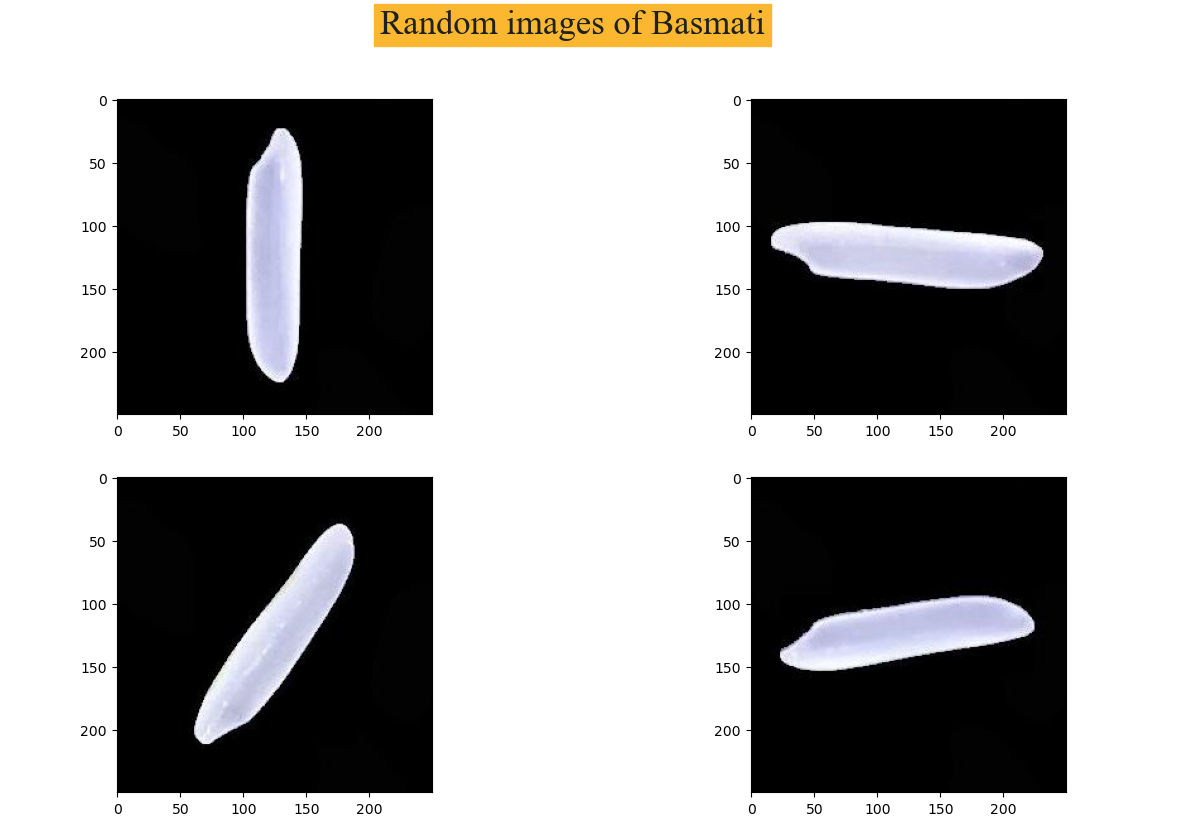

In [4]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_Basmati)
    imgs = imread(random_img)
    plt.suptitle("Random images of Basmati",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

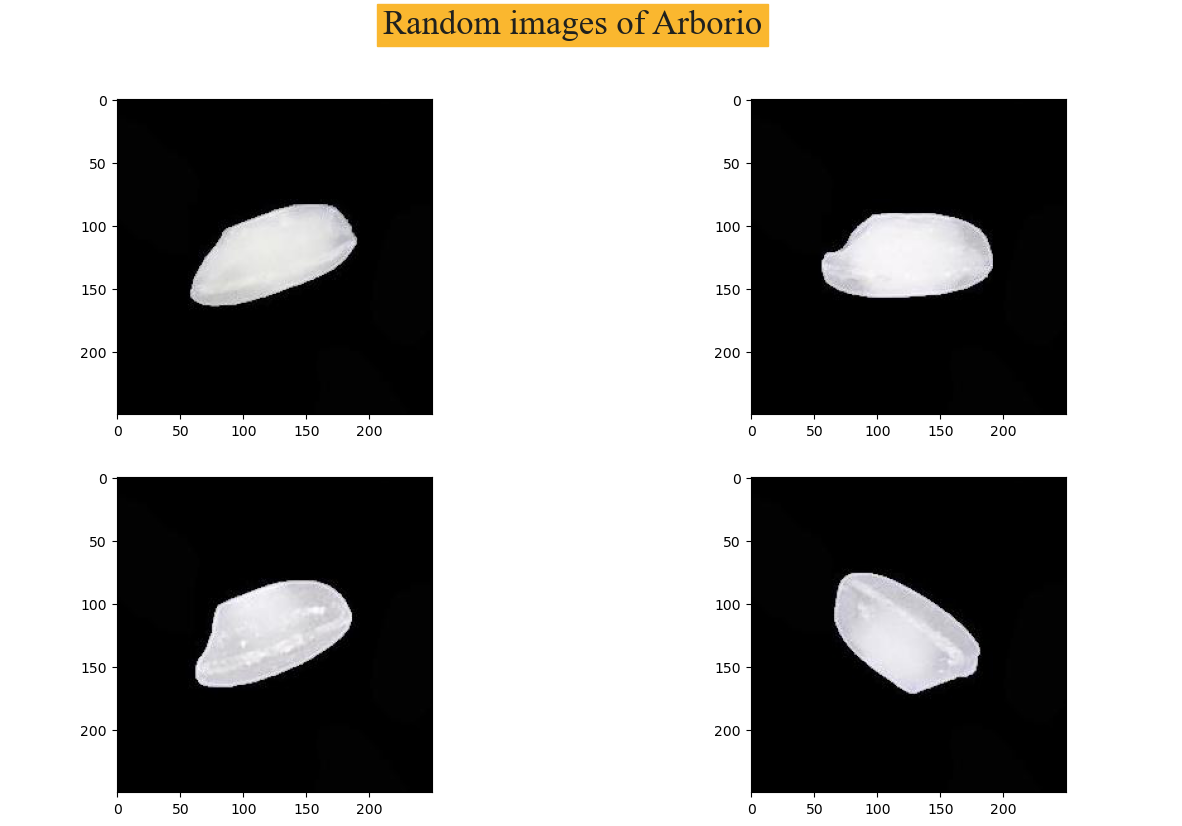

In [5]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_Arborio)
    imgs = imread(random_img)
    plt.suptitle("Random images of Arborio",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

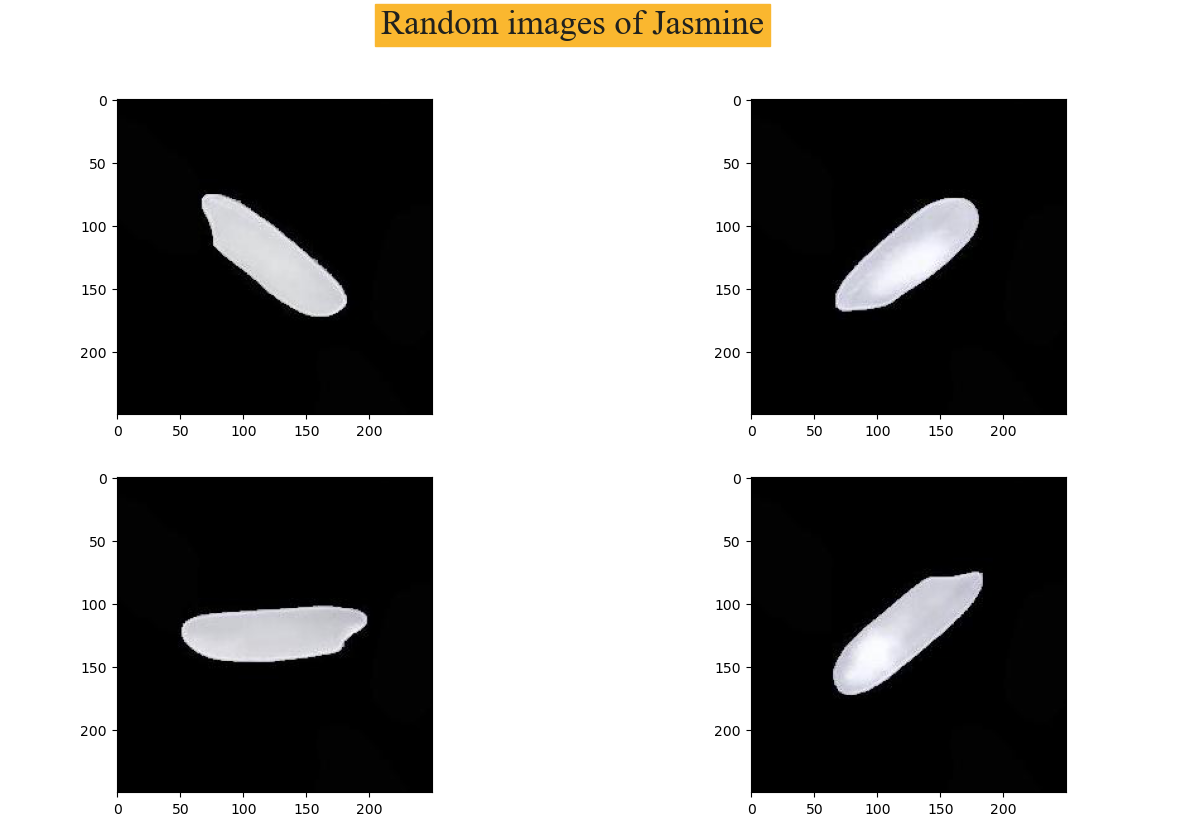

In [6]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_Jasmine)
    imgs = imread(random_img)
    plt.suptitle("Random images of Jasmine",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [7]:
print("Number of samples in (Class = Arborio) = " ,len(image_list_Arborio))
print("Number of samples in (Class = Basmati) = " ,len(image_list_Basmati))
print("Number of samples in (Class = Ipsala) = " ,len(image_list_Ipsala))
print("Number of samples in (Class = Jasmine) = " ,len(image_list_Jasmine))
print("Number of samples in (Class = Karacadag) = " ,len(image_list_Karacadag))

Number of samples in (Class = Arborio) =  156
Number of samples in (Class = Basmati) =  126
Number of samples in (Class = Ipsala) =  144
Number of samples in (Class = Jasmine) =  180
Number of samples in (Class = Karacadag) =  168


In [8]:
print(.75*len(image_list_Arborio) , .2*len(image_list_Arborio) ,.05*len(image_list_Arborio))
print(.75*len(image_list_Basmati) , .2*len(image_list_Basmati) ,.05*len(image_list_Basmati))
print(.75*len(image_list_Ipsala) , .2*len(image_list_Ipsala) ,.05*len(image_list_Ipsala))
print(.75*len(image_list_Jasmine) , .2*len(image_list_Jasmine) ,.05*len(image_list_Jasmine))
print(.75*len(image_list_Karacadag) , .2*len(image_list_Karacadag) ,.05*len(image_list_Karacadag))

117.0 31.200000000000003 7.800000000000001
94.5 25.200000000000003 6.300000000000001
108.0 28.8 7.2
135.0 36.0 9.0
126.0 33.6 8.4


In [9]:
print("Train","Test", "Valid")

train_Arborio = image_list_Arborio[:90]
test_Arborio = image_list_Arborio[90:132]
valid_Arborio = image_list_Arborio[132:]

print (len(train_Arborio), len(test_Arborio), len(valid_Arborio))

train_Basmati = image_list_Basmati[:70]
test_Basmati = image_list_Basmati[70:100]
valid_Basmati = image_list_Basmati[100:]

print (len(train_Basmati), len(test_Basmati), len(valid_Basmati))

train_Ipsala = image_list_Ipsala[:90]
test_Ipsala = image_list_Ipsala[90:120]
valid_Ipsala = image_list_Ipsala[120:]

print (len(train_Ipsala), len(test_Ipsala), len(valid_Ipsala))

train_Jasmine = image_list_Jasmine[:120]
test_Jasmine = image_list_Jasmine[120:170]
valid_Jasmine = image_list_Jasmine[170:]

print (len(train_Jasmine), len(test_Jasmine), len(valid_Jasmine))

train_Karacadag = image_list_Karacadag[:130]
test_Karacadag = image_list_Karacadag[130:150]
valid_Karacadag = image_list_Karacadag[150:]

print (len(train_Karacadag), len(test_Karacadag), len(valid_Karacadag))

Train Test Valid
90 42 24
70 30 26
90 30 24
120 50 10
130 20 18


In [10]:
train_Arborio_df = pd.DataFrame({'image':train_Arborio, 'label':'Arborio'})
train_Basmati_df = pd.DataFrame({'image':train_Basmati, 'label':'Basmati'})
train_Ipsala_df = pd.DataFrame({'image':train_Ipsala, 'label':'Ipsala'})
train_Jasmine_df = pd.DataFrame({'image':train_Jasmine, 'label':'Jasmine'})
train_Karacadag_df = pd.DataFrame({'image':train_Karacadag, 'label':'Karacadag'})

In [11]:
test_Arborio_df = pd.DataFrame({'image':test_Arborio, 'label':'Arborio'})
test_Basmati_df = pd.DataFrame({'image':test_Basmati, 'label':'Basmati'})
test_Ipsala_df = pd.DataFrame({'image':test_Ipsala, 'label':'Ipsala'})
test_Jasmine_df = pd.DataFrame({'image':test_Jasmine, 'label':'Jasmine'})
test_Karacadag_df = pd.DataFrame({'image':test_Karacadag, 'label':'Karacadag'})

In [12]:
valid_Arborio_df = pd.DataFrame({'image':valid_Arborio, 'label':'Arborio'})
valid_Basmati_df = pd.DataFrame({'image':valid_Basmati, 'label':'Basmati'})
valid_Ipsala_df = pd.DataFrame({'image':valid_Ipsala, 'label':'Ipsala'})
valid_Jasmine_df = pd.DataFrame({'image':valid_Jasmine, 'label':'Jasmine'})
valid_Karacadag_df = pd.DataFrame({'image':valid_Karacadag, 'label':'Karacadag'})

In [13]:
train_df = pd.concat([train_Arborio_df, train_Basmati_df, train_Ipsala_df, train_Jasmine_df, train_Karacadag_df])
test_df = pd.concat([test_Arborio_df, test_Basmati_df, test_Ipsala_df, test_Jasmine_df, test_Karacadag_df])
val_df = pd.concat([valid_Arborio_df, valid_Basmati_df, valid_Ipsala_df, valid_Jasmine_df, valid_Karacadag_df])

In [14]:
train_df.head()

,image,label
0,D:\PHD/Rice/Arborio\Arborio (13141).jpg,Arborio
1,D:\PHD/Rice/Arborio\Arborio (13142).jpg,Arborio
2,D:\PHD/Rice/Arborio\Arborio (13143).jpg,Arborio
3,D:\PHD/Rice/Arborio\Arborio (13144).jpg,Arborio
4,D:\PHD/Rice/Arborio\Arborio (13145).jpg,Arborio


In [15]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

Number of rows in train dataframe is:  500
Number of rows in test dataframe is:  172
Number of rows in val dataframe is:  102


In [16]:
random_img_height = random.choice(train_Jasmine)

In [17]:
image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

The height is  250
The width is  250


In [18]:
Batch_size = 64
Img_height = 240
Img_width = 240

In [29]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

In [30]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [31]:
Alex_model = model_Alex.fit(trainDataset, epochs=5, validation_data=valDataset)

Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 91s 10s/step - accuracy: 0.8614 - loss: 0.2664 - val_accuracy: 0.9314 - val_loss: 0.1028
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - accuracy: 0.9788 - loss: 0.0439 - val_accuracy: 0.9608 - val_loss: 0.0389
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 81s 10s/step - accuracy: 0.9836 - loss: 0.0248 - val_accuracy: 0.9412 - val_loss: 0.0629
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - accuracy: 0.9700 - loss: 0.0379 - val_accuracy: 0.9412 - val_loss: 0.0695
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 82s 10s/step - accuracy: 0.9775 - loss: 0.0286 - val_accuracy: 0.9510 - val_loss: 0.0373


In [32]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

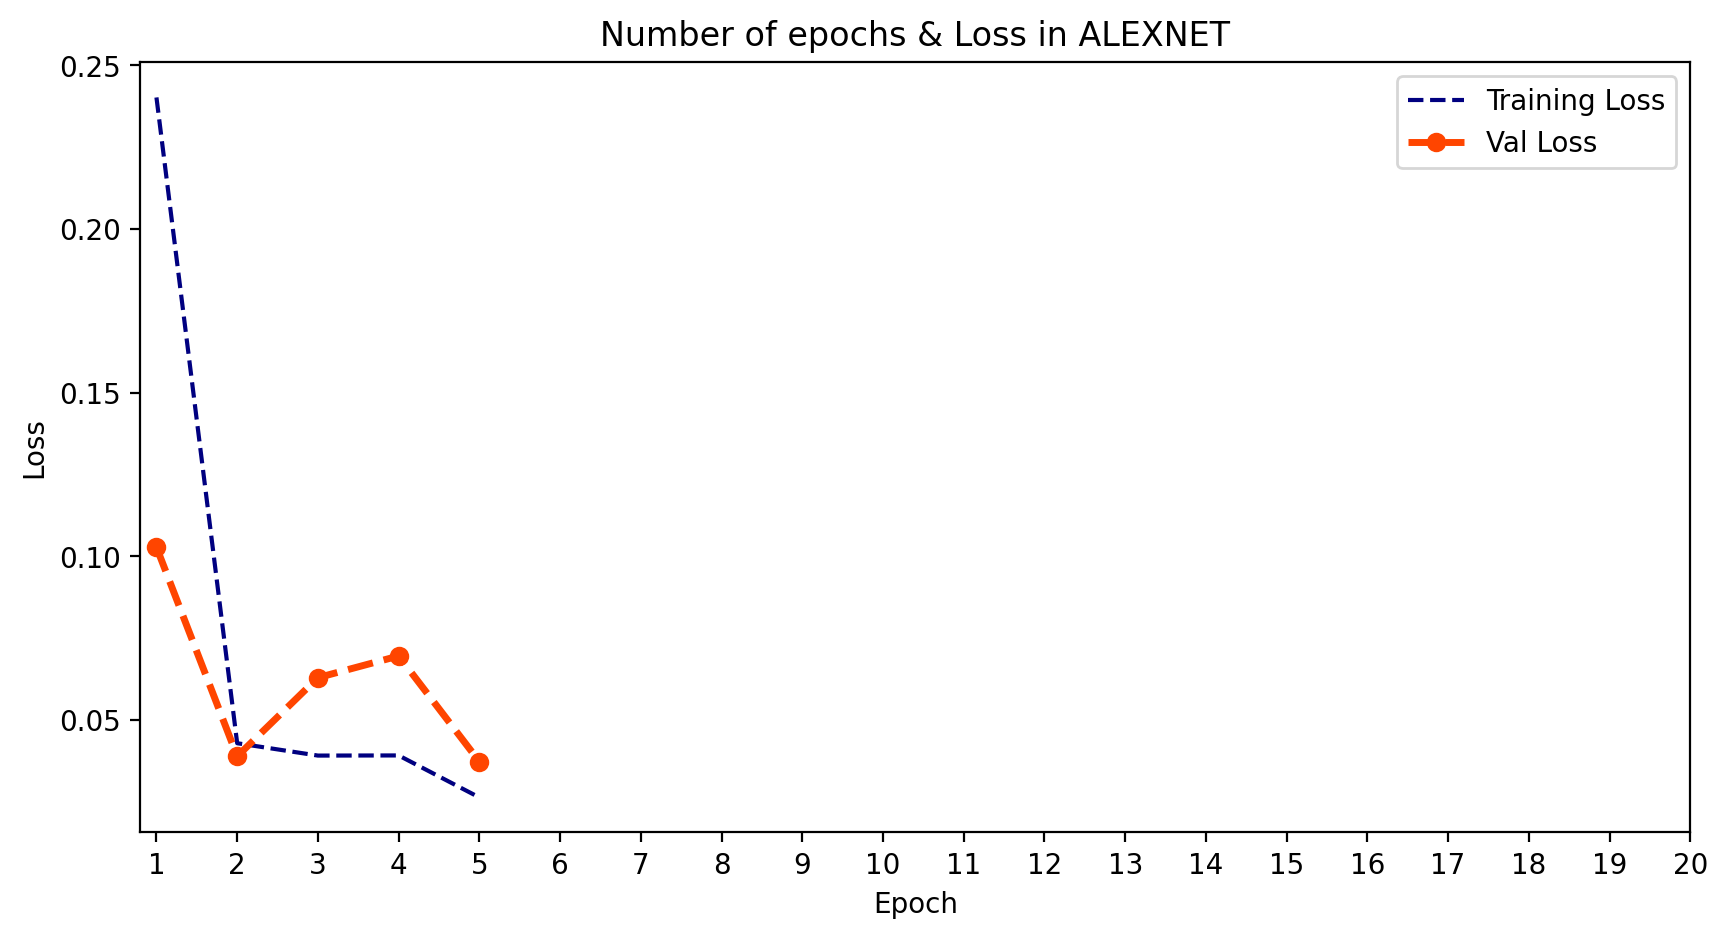

In [33]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

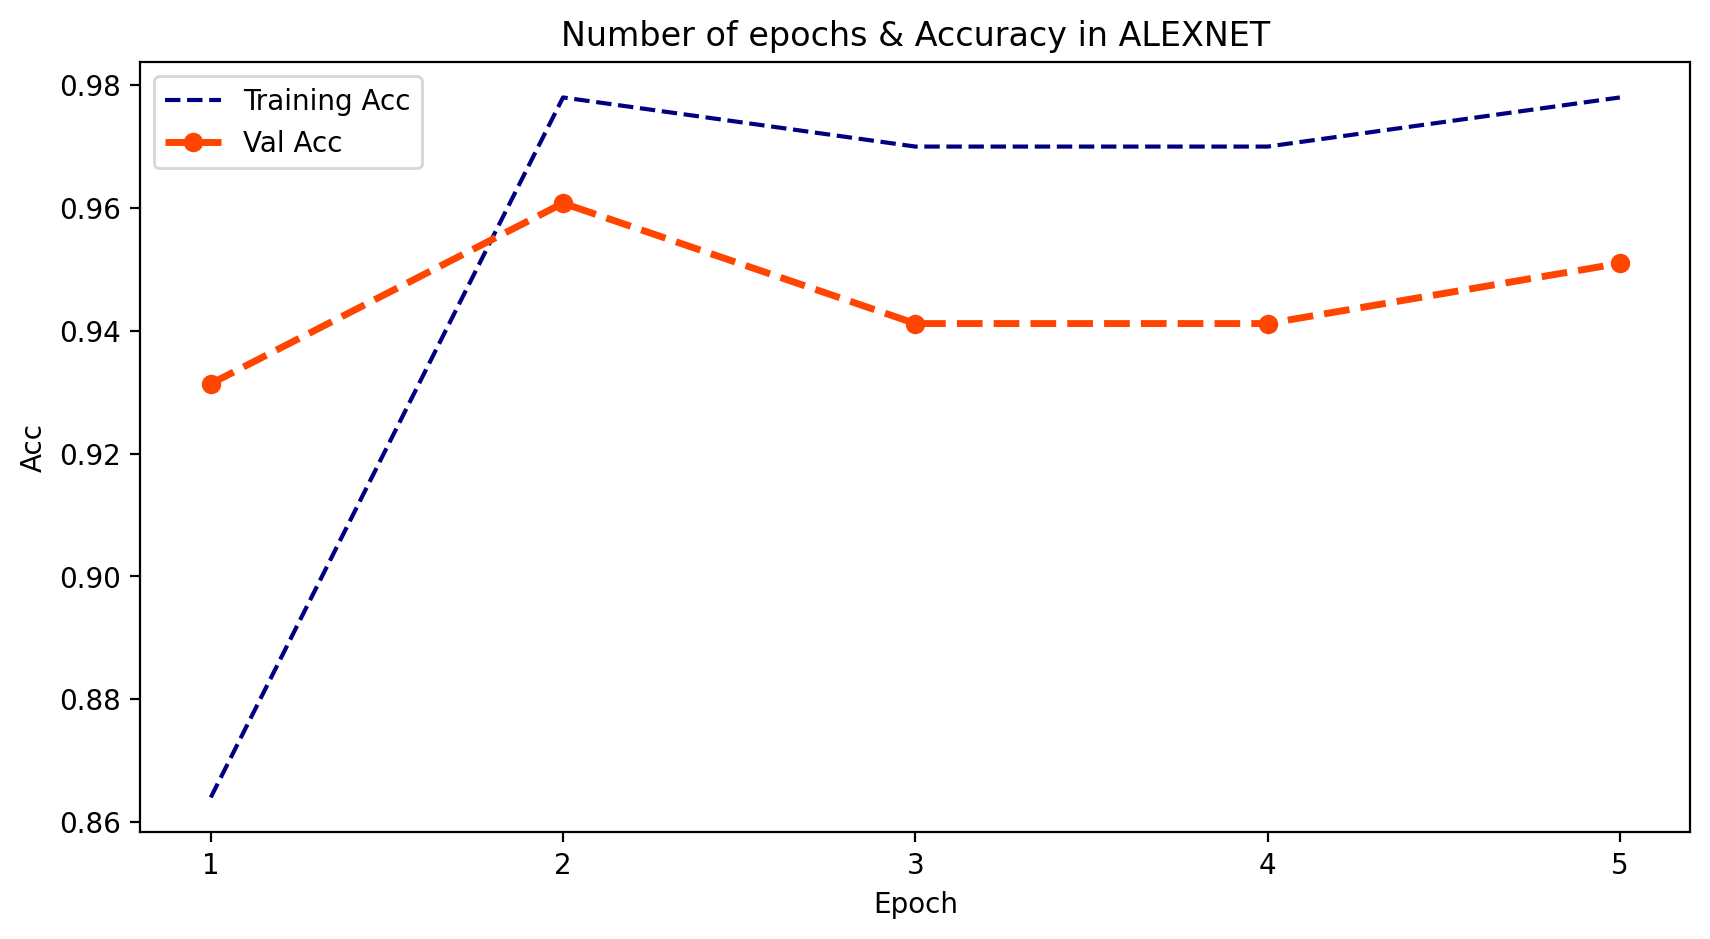

In [34]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

In [35]:
def VGGNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 238, 238, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 236, 236, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 236, 236, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 118, 118, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 116, 116, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 114, 114, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 114, 114, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 57, 57, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 55, 55, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 53, 53, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 51, 51, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 51, 51, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 23, 23, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 19, 19, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   169,873,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 194,312,261 (741.24 MB)

 Trainable params: 194,311,365 (741.24 MB)

 Non-trainable params: 896 (3.50 KB)

In [36]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
VGG_model = model_VGG.fit(trainDataset, epochs=2, validation_data=valDataset)